<a href="https://colab.research.google.com/github/DaniilAszn/Math_modeling_2_course/blob/main/MMAP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 1**

В соответствии с практикой 1 реализовать дикретизацию интегрального уравнения Фредгольма 2-го рода с вырожденным ядром на отрезке с произвольным количеством точек коллокации N:

$$u(x) + \int \limits_{0}^{1} xy \cdot u(y) dy = x$$

Решение описано ранее

# **Задание 2**

Реализовать на любом языке программирования двухшаговый итерационный метод градиентного спуска и протестировать его на решении практики 1

Метод двухшагового градиентного спуска:

1.
$$u_{1} = u_0 - \frac{{\lVert A^Tr_0 \rVert}^2}{{\lVert AA^Tr_0 \rVert}^2} \cdot A^Tr_0$$
$$r_0 = Au_0 - f$$

2.
\begin{equation*}
    \begin{cases}
        \alpha_k \cdot {\lVert \Delta r_k \rVert}^2 + \gamma_k \cdot {\lVert A^Tr_k \rVert}^2 = 0
        \\
        \alpha_k \cdot {\lVert A^Tr_k \rVert}^2 + \gamma_k \cdot {\lVert AA^Tr_k \rVert}^2 = {\lVert A^Tr_k \rVert}^2
    \end{cases}
\end{equation*}
$$r_k = Au_k - f$$

$$u_{k+1} = u_k - \alpha_k \cdot (u_k - u_{k-1}) - \gamma_k \cdot A^Tr_k$$

3.
$$\frac{\lVert u_k - u_{k-1} \rVert}{\lVert f \rVert} < \varepsilon$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
N = int(input("Введите значение N: "))
a, b = 0, 1
h = (b - a) / N

Введите значение N: 7


In [ ]:
def x(i):
    return i * h + h / 2 + a


def y(j):
    return j * h + h / 2 + a


def A_elements(i, j):
    return (x(i) * y(j) * h) + 1 * (i == j)


def f_elements(i, j):
    return x(i)

In [ ]:
rows, cols = N, N

A = np.fromfunction(A_elements, (rows, cols))

In [ ]:
rows, cols = N, 1

f = np.fromfunction(f_elements, (rows, cols))

In [ ]:
# Начальное значение вектора u
u_old = np.array([[0.]] * N)

# Критерий останова
eps = 1e-10

In [ ]:
def double_step_gradient_descent(u_old, A, f, r, eps):
    steps = 1

    # Cтартовые значения u и r
    u_0 = u_old
    r_0 = r

    # Подготовка к первому шагу
    AT = np.matrix.transpose(A) # не обязательно
    AT_r = AT @ r_0
    up = np.linalg.norm(AT_r) ** 2
    down = np.linalg.norm(A @ AT_r) ** 2

    u_1 = u_0 - (up / down) * (AT @ r_0) # делаем шаг для определения u_1

    # После определения u_1 переходим к основному шагу алгоритма
    r_1 = A @ u_1 - f
    AT_r = AT @ r_1

    Mat = np.array([[np.linalg.norm(r_1 - r_0) ** 2, np.linalg.norm(AT_r) ** 2],
                    [np.linalg.norm(AT_r) ** 2, np.linalg.norm(A @ AT_r) ** 2]])
    Vec = np.array([0.,
                    np.linalg.norm(AT_r) ** 2])
    Ans = np.linalg.pinv(Mat) @ Vec
    alpha = Ans[0]
    gamma = Ans[1]

    u_2 = u_1 - alpha * (u_1 - u_0) - gamma * AT_r # второй шаг (основной)

    norm_diff_u = np.linalg.norm(u_2 - u_1)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_0 = u_1
            u_1 = u_2

            r_0 = r_1
            r_1 = A @ u_1 - f
            AT_r = AT @ r_1

            Mat = np.array([[np.linalg.norm(r_1 - r_0) ** 2, np.linalg.norm(AT_r) ** 2],
                            [np.linalg.norm(AT_r) ** 2, np.linalg.norm(A @ AT_r) ** 2]])
            Vec = np.array([0.,
                            np.linalg.norm(AT_r) ** 2])
            Ans = np.linalg.pinv(Mat) @ Vec
            alpha = Ans[0]
            gamma = Ans[1]

            u_2 = u_1 - alpha * (u_1 - u_0) - gamma * AT_r

            norm_diff_u = np.linalg.norm(u_2 - u_1)
            # norm_f = np.linalg.norm(f)
    else:
        pass

    return u_2, steps

# Для двухшагового градиентного спуска
r = A @ u_old - f

u_DSGD, count_steps_DSGD = double_step_gradient_descent(u_old, A, f, r, eps)

In [ ]:
def error(Arr_num, Arr_ana):
    return np.sqrt(np.sum((Arr_ana - Arr_num) ** 2) / np.sum(Arr_ana ** 2))


def u_ana(x):
    return (3 / 4) * x


x_values = [x(i) for i in range(N)]
u_ana_values = np.array([u_ana(i) for i in x_values]).reshape(N, 1)

In [ ]:
print(f"delta_DSGD = {error(u_DSGD, u_ana_values)}")
print(f"Число шагов: {count_steps_DSGD}")

delta_DSGD = 0.0012771392081739824
Число шагов: 1


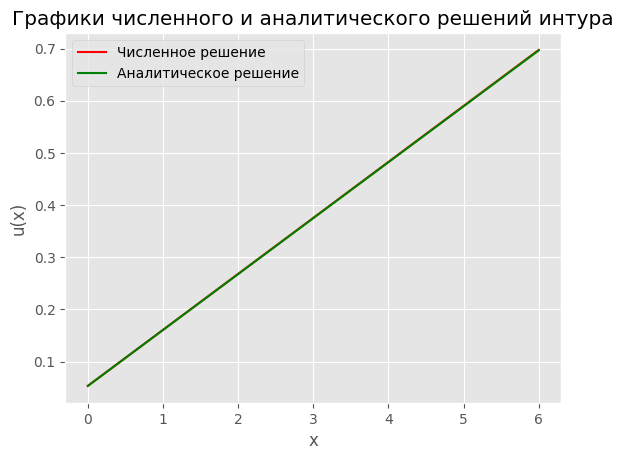

In [ ]:
plt.plot(u_DSGD, c='red', label='Численное решение')
plt.plot(u_ana_values, c='green', label='Аналитическое решение')
plt.title('Графики численного и аналитического решений интура')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

# **Задание 3**

При одинаковых значениях $\varepsilon$ сравнить эффективность и качество сходимости итерационных методов: метода простой итерации, градиентного спуска и двухшагового метода градиентного спуска.

### Метод простой итерации:

In [ ]:
def simple_iteration(u_old, B, f, eps):
    steps = 1

    u_new = B @ u_old + f

    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new

            u_new = B @ u_old + f

            norm_diff_u = np.linalg.norm(u_new - u_old)
            # norm_f = np.linalg.norm(f)
    else:
        pass

    return u_new, steps

# Для МПИ
E = np.eye(N)
B = E - A

u_MSI, count_steps_MSI = simple_iteration(u_old, B, f, eps)

In [ ]:
print(f"delta_MSI = {error(u_MSI, u_ana_values)}")
print(f"Число шагов: {count_steps_MSI}")

delta_MSI = 0.0012771391796625837
Число шагов: 22


### Градиентный спуск:

In [ ]:
def gradient_descent(u_old, A, f, r, eps):
    steps = 1

    AT = np.matrix.transpose(A) # не обязательно
    AT_r = AT @ r
    up = np.linalg.norm(AT_r) ** 2
    down = np.linalg.norm(A @ AT_r) ** 2

    u_new = u_old - (up / down) * (AT @ r)

    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new
            r = A @ u_old - f
            AT_r = AT @ r
            up = round(np.linalg.norm(AT_r) ** 2, 30)
            down = round(np.linalg.norm(A @ AT_r) ** 2, 30)

            if down != 0:
                u_new = u_old - (up / down) * (AT @ r)

                norm_diff_u = np.linalg.norm(u_new - u_old)
            else:
                break
    else:
        pass

    return u_new, steps

# Для градиентного спуска
r = A @ u_old - f

u_GD, count_steps_GD = gradient_descent(u_old, A, f, r, eps)

In [ ]:
print(f"delta_GD = {error(u_GD, u_ana_values)}")
print(f"Число шагов: {count_steps_GD}")

delta_GD = 0.0012771392081739824
Число шагов: 2


In [ ]:
Methods_table = {'DSGD': (error(u_DSGD, u_ana_values), count_steps_DSGD),
                 'GD': (error(u_GD, u_ana_values), count_steps_GD),
                 'MSI': (error(u_MSI, u_ana_values), count_steps_MSI)}

print(Methods_table)

Methods_df = pd.DataFrame.from_dict(Methods_table)
print(Methods_df)

{'DSGD': (0.0012771392081739824, 1), 'GD': (0.0012771392081739824, 2), 'MSI': (0.0012771391796625837, 22)}
       DSGD        GD        MSI
0  0.001277  0.001277   0.001277
1  1.000000  2.000000  22.000000


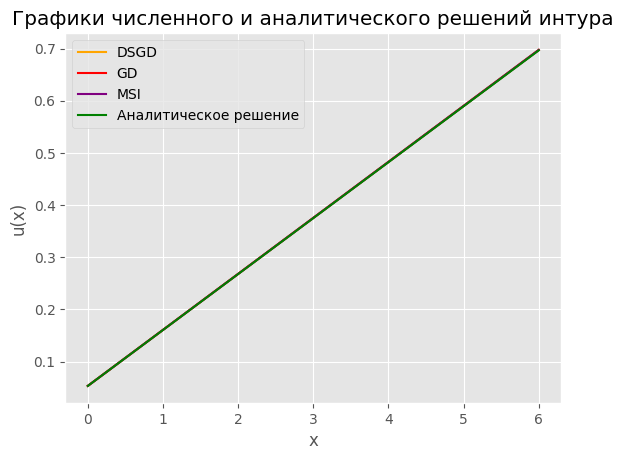

In [ ]:
plt.plot(u_DSGD, c='orange', label='DSGD')
plt.plot(u_GD, c='red', label='GD')
plt.plot(u_MSI, c='purple', label='MSI')
plt.plot(u_ana_values, c='green', label='Аналитическое решение')
plt.title('Графики численного и аналитического решений интура')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()